In [29]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

In [30]:
uid = "sub-301"
slice_index = 25

### Before Resampling

In [31]:
root_path = f"/mnt/storage/cmb_segmentation_dataset/Task2/{uid}"

# Load the NIfTI file
nifti_path = f"{root_path}/{uid}_space-T2S_desc-masked_T1.nii.gz"
nifti_img = nib.load(nifti_path)
nifti_img_header = nifti_img.header
# print(nifti_img_header.get("pixdim"))
nifti_data1 = nifti_img.get_fdata()

nifti_path2 = f"{root_path}/{uid}_space-T2S_desc-masked_T2.nii.gz"
nifti_img2 = nib.load(nifti_path2)
nifti_img_header2 = nifti_img2.header
nifti_data2 = nifti_img2.get_fdata()

nifti_path2S = f"{root_path}/{uid}_space-T2S_desc-masked_T2S.nii.gz"
nifti_img2S = nib.load(nifti_path2S)
nifti_img_header2S = nifti_img2S.header
nifti_data2S = nifti_img2S.get_fdata()

nifti_path_mask = f"{root_path}/{uid}_space-T2S_CMB.nii.gz"
nifti__mask = nib.load(nifti_path_mask)
print(nifti__mask)
nifti_mask = nifti__mask.get_fdata()


<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 39)
affine:
[[-9.99989927e-01  4.42176871e-03  2.46149441e-03  1.26253448e+02]
 [ 4.49454971e-03  9.88969684e-01  4.44155097e-01 -9.85232620e+01]
 [ 1.56789989e-04 -1.48051962e-01  2.96697736e+00 -3.50184965e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256  39   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.000000e+00  1.000000e+00  1.000000e+00  3.000039e+00  1.120000e+00
  1.000000e+00  1.000000e+00  7.544700e+04]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      

In [32]:
# Find slices that contain the pixel value 1
slices_with_value_1 = []
for i in range(nifti_mask.shape[2]):
    if 1 in np.unique(nifti_mask[:, :, i]):
        slices_with_value_1.append(i)

print(f"Slices with pixel value 1: {slices_with_value_1}")

Slices with pixel value 1: [35]


25
(256, 256, 39)
(256, 256, 39)
(256, 256, 39)
(256, 256, 39)
[0. 1.]


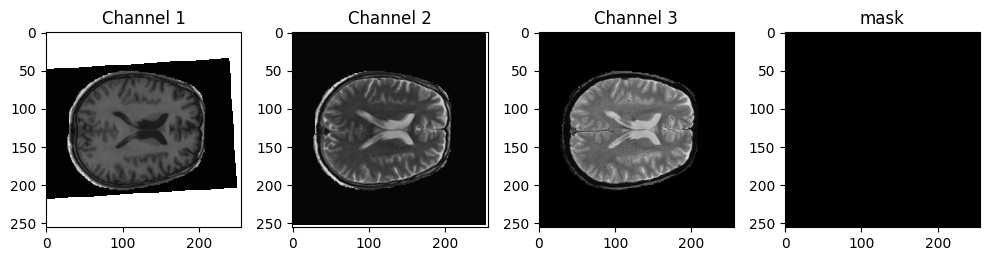

In [33]:
print(slice_index)
# Create a figure
plt.figure(figsize=(10, 10))

# Plot the first channel
plt.subplot(1, 4, 1)
plt.imshow(nifti_data1[:, :, slice_index], cmap='gray')
plt.title('Channel 1')

# Plot the second channel
plt.subplot(1, 4, 2)
plt.imshow(nifti_data2[:, :, slice_index], cmap='gray')
plt.title('Channel 2')

# Plot the third channel
plt.subplot(1, 4, 3)
plt.imshow(nifti_data2S[:, :, slice_index], cmap='gray')
plt.title('Channel 3')

# Plot the third channel
plt.subplot(1, 4, 4)
plt.imshow(nifti_mask[:, :, slice_index], cmap='gray')
plt.title('mask')

print(nifti_data1.shape)
print(nifti_data2.shape)
print(nifti_data2S.shape)
print(nifti_mask.shape)
print(np.unique(nifti_mask[:,:,:]))
# Set the main title for the entire figure
# plt.suptitle('NIfTI Image Channels', fontsize=16)

# Adjust layout to reduce space between title and plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(top=0.85)

# Show the plot
plt.show()

### After Resampling

In [34]:
# /mnt/storage/ji/brain_mri_valdo_mayo/valdo_1mm_0205
root_path = f"/mnt/storage/ji/brain_mri_valdo_mayo/valdo_1mm_0205/{uid}"

# Load the NIfTI file
nifti_path = f"{root_path}/{uid}_space-T2S_desc-masked_T1.nii.gz"
nifti_img = nib.load(nifti_path)
nifti_data1 = nifti_img.get_fdata()

nifti_path2 = f"{root_path}/{uid}_space-T2S_desc-masked_T2.nii.gz"
nifti_img2 = nib.load(nifti_path2)
nifti_data2 = nifti_img2.get_fdata()

nifti_path2S = f"{root_path}/{uid}_space-T2S_desc-masked_T2S.nii.gz"
nifti_img2S = nib.load(nifti_path2S)
nifti_img_header2S = nifti_img2S.header
# print(nifti_img_header2S.get("pixdim"))
# print(nifti_img_header2S)
nifti_data2S = nifti_img2S.get_fdata()


nifti_path_mask = f"{root_path}/{uid}_space-T2S_CMB.nii.gz"
nifti__mask = nib.load(nifti_path_mask)
nifti_mask = nifti__mask.get_fdata()

25
(256, 256, 117)
(256, 256, 117)
(256, 256, 117)
(256, 256, 117)
mask unique value:  [0. 1.]


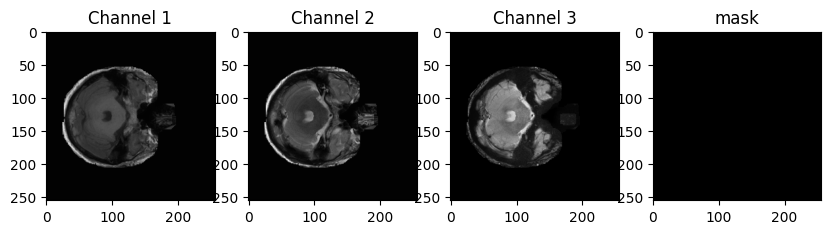

In [35]:
print(slice_index)
# Create a figure
plt.figure(figsize=(10, 10))

# Plot the first channel
plt.subplot(1, 4, 1)
plt.imshow(nifti_data1[:, :, slice_index], cmap='gray')
plt.title('Channel 1')

# Plot the second channel
plt.subplot(1, 4, 2)
plt.imshow(nifti_data2[:, :, slice_index], cmap='gray')
plt.title('Channel 2')

# Plot the third channel
plt.subplot(1, 4, 3)
plt.imshow(nifti_data2S[:, :, slice_index], cmap='gray')
plt.title('Channel 3')

# Plot the third channel
plt.subplot(1, 4, 4)
plt.imshow(nifti_mask[:, :, slice_index], cmap='gray')
plt.title('mask')

print(nifti_data1.shape)
print(nifti_data2.shape)
print(nifti_data2S.shape)
print(nifti_mask.shape)

print("mask unique value: ", np.unique(nifti_mask[:, :, :]))

# Show the plot
plt.show()